# Classification Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Twitter Sentiment Classification

- INSERT THIS SECTION

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we will import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

First, we include a list of packages that may need to be installed on your system:

In [152]:
!pip install wordcloud
!pip install contractions



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9298 sha256=e075854f7c7238e901820ec46256cf93caede5df491aa0f3cd6fe77d27412e3a
  Stored in directory: c:\users\kobus\appdata\local\pip\cache\wheels\65\3c\c7\44672c5062c16d05760b1eaddbf611d2f6a4b715c6d6777418
Successfully built flashtext


Next, we import all necessary modules:

In [288]:
'''Libraries for data loading, data manipulation and data visulisation'''
# Import Numpy and Pandas for Data loading and manipulation
import pandas as pd
import numpy as np
import emoji
import regex
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer

import string
import contractions
from emot.emo_unicode import UNICODE_EMOJI, UNICODE_EMOJI_ALIAS, EMOTICONS_EMO
from flashtext import KeywordProcessor



# Import visulisation packages
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



# Set style for seabourn plots
sns.set_theme(style="whitegrid")



'''Libraries for data preparation and model building'''
# import 

'''Setting global constants to ensure notebook results are reproducible'''
# PARAMETER_CONSTANT = ###

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kobus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'Setting global constants to ensure notebook results are reproducible'

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we load the datasets from the files into some DataFrames. |

---

In [80]:
# Creating dataframes for the different datasets
df_train = pd.read_csv('train.csv')
df_evaluate = pd.read_csv('test_with_no_labels.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we will perform an in-depth analysis of all the variables in the DataFrame. |

---


Let's start with investigating the dataset by viewing how the dataframe is currently looking:

In [81]:
# Show the first 30 entries of the training dataset:
df_train.head(30)

sentiment                                            message  tweetid
0           1  PolySciMajor EPA chief doesn't think carbon di...   625221
1           1  It's not like we lack evidence of anthropogeni...   126103
2           2  RT @RawStory: Researchers say we have three ye...   698562
3           1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4           1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954
5           1  Worth a read whether you do or don't believe i...   425577
6           1  RT @thenation: Mike Pence doesn’t believe in g...   294933
7           1  RT @makeandmendlife: Six big things we can ALL...   992717
8           1  @AceofSpadesHQ My 8yo nephew is inconsolable. ...   664510
9           1  RT @paigetweedy: no offense… but like… how do ...   260471
10          1  RT @StephenSchlegel: she's thinking about how ...   295793
11          1  I do hope people who are vocal about climate c...   763719
12          2  RT @tveitdal: We only have a 5 percent chance ...   454673
13          1  RT @Alifaith55: Oh. My. God.\n\nTrump's Govern...    41161
14          2  Fossil fuel giant ExxonMobil ‘misled’ the publ...   658092
15          1  RT @GlblCtzn: 'I don't wanna live forever – an...   319524
16          1  RT @jackholmes0: Issues scrubbed from https://...   698009
17          1  RT @patagonia: If our elected leaders fail to ...   490604
18          1  RT @SenSanders: We have a president-elect who ...   228658
19          0  Calum: *tweets abt reunitingish w the cast*\n-...   547924
20          1  RT @c40cities: 46 C40 Mayors, representing 250...   625014
21          1  RT @World_Wildlife: How climate change impacts...   690605
22          0  we also met this guy, he let us in on some tru...    67545
23          1  https://t.co/KyNIBjmDk5\nScientists say climat...   567842
24          1  RT @TammyGrubb: Obama raises climate change. Y...   684492
25          1  I hate to say this, but *mental* health will b...   438578
26          2  Bangladesh confronting climate change head on ...   365291
27          1  Hey There! Michael's vetted and approved marke...   387685
28         -1  Sally Kohn’s latest evidence of climate change...   355491
29          1  RT @StarTalkRadio: First: The public understan...   354015

We have 3 distinct columns in the dataset: 
- `sentiment`: Which class a tweet belongs in
- `message`: Tweet body
- `tweetid`: Twitter unique id

For the purposes of our model, we wish to predict the sentiment regarding climate change of an individual, based on the message contained within their tweets. This means that our target variable is that of `sentiment`, and our predictor variable is that of `message` 

We also see that the classes that our target variable `sentiment` falls into is more than 2, which means we are not dealing with a simple binary classification problem. These classes can be described as follows:

- 2 **News**: the tweet links to factual news about climate change
- 1 **Pro**: the tweet supports the belief of man-made climate change
- 0 **Neutral**: the tweet neither supports nor refutes the belief of man-made climate change
- -1 **Anti**: the tweet does not believe in man-made climate change

Let's now look at the datatypes contained within our dataset:

In [82]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


We note that we have a total of 15819 entries, spanning 3 columns.

We also see that both our `tweetid` and `sentiment` columns is of integer type, while our `message` column is of type string. This was to be expected, but it is always a good idea to verify! 




Let us consider if our dataset contains missing values:

In [83]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Luckily, we don't have any missing data. 
Let's check if our dataset contains repeating tweets:

In [84]:
duplicates = df_train[df_train[['message', 'sentiment']].duplicated(keep=False)]
duplicates.head()


sentiment                                            message  tweetid
10          1  RT @StephenSchlegel: she's thinking about how ...   295793
17          1  RT @patagonia: If our elected leaders fail to ...   490604
18          1  RT @SenSanders: We have a president-elect who ...   228658
21          1  RT @World_Wildlife: How climate change impacts...   690605
35          1  RT @BernieSanders: #ImVotingBecause the future...   817108

We see that we have 1900 entries for which the same tweet and sentiment is repeated somewhere in the dataset. Since those variables constitutes both our predictors and target variables, we should consider removing them as they add no value to the model anymore.


Now, let's look at how our data is distributed within each class in our target variable in the dataset we will be training on:

Text(0, 0.5, 'Count')

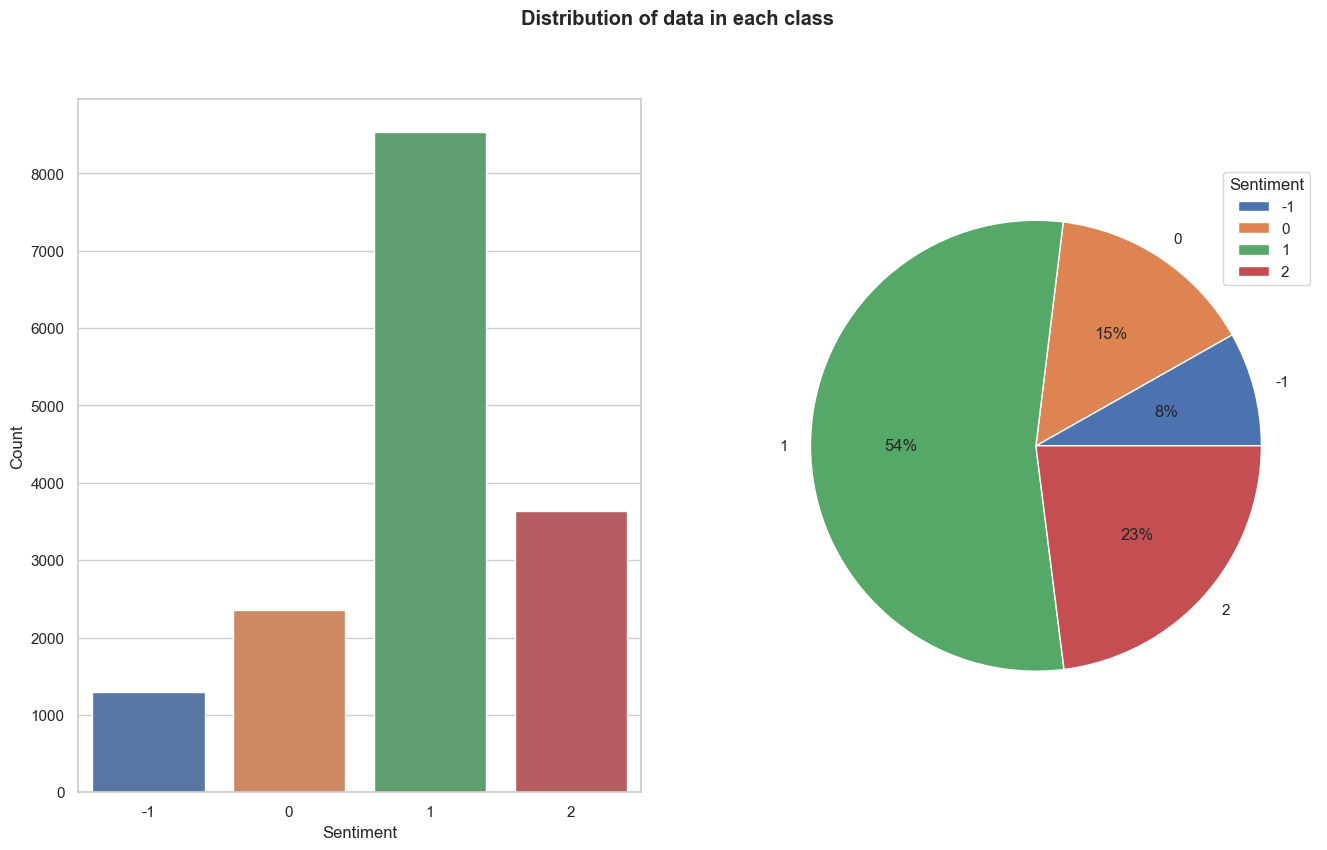

In [85]:
# Create multiple subplots
fig, axs = plt.subplots(1,2, figsize=(16,9))
# Set title of graph
fig.suptitle("Distribution of data in each class", fontweight='bold' )

# Plot 
sns.countplot(ax=axs[0], x=df_train['sentiment'])
df_train.groupby(['sentiment']).count().plot(ax=axs[1], kind = 'pie', y='message', autopct='%1.0f%%')

axs[1].set_ylabel('')
axs[1].legend(title = "Sentiment")

axs[0].set_xlabel('Sentiment')
axs[0].set_ylabel('Count')


From the figures above, we see that the dataset we are working with is very unbalanced. More than half of our dataset is people having pro-climate change sentiments, while only $ 8 \% $ of our data represents people with anti-climate change opinions. This might lead our models to become far better at identifying pro-climate change sentiment than anti-climate change sentiment, and we might need to consider balancing the data by resampling it.

Next, let us look at if any features contained within the tweets can help us identify to which sentiment the user belongs. Let's write some functions that will extract the retweets, hashtags and mentions from the tweets:

In [86]:
'''Determine if there is a retweet within the tweet'''
def is_retweet(tweet):
    word_list = tweet.split()
    if "RT" in word_list:
        return 1
    else:
        return 0

''' Function to extract retweet handles from tweet '''
def get_retweet(tweet):
    word_list = tweet.split()
    if word_list[0] == "RT":
        handle = word_list[1]
    else:
        handle = ''
        
    handle = handle.replace(':', "")

    return handle


'''Count the number of hashtags within the tweet'''
def count_hashtag(tweet):
    count = 0
    word_list = tweet.split()
    for word in word_list:
        if word[0] == '#':
            count +=1
    
    return count

'''Extract the hashtags within the tweet'''
def get_hashtag(tweet):
    hashtags = []
    word_list = tweet.split()
    for word in word_list:
        if word[0] == '#':
            hashtags.append(word)
    
    returnstr = ""
    for tag in hashtags:
        returnstr += " " + tag

    return returnstr


'''Count the number of mentions within the tweet'''
def count_mentions(tweet):
    count = 0
    word_list = tweet.split()
    if "RT" in word_list:
        count += -1 # Remove mention contained in retweet form consideration
        
    for word in word_list:
            if word[0] == '@':
                count +=1
    if count == -1:
        count = 0
    return count

'''Extract the mentions within the tweet'''
def get_mentions(tweet):
    mentions = []
    word_list = tweet.split()
    if "RT" in word_list:
        word_list.pop(1) # Retweets don't count as mentions, so we remove the retweet handle from consideration

    for word in word_list:
        if word[0] == '@':
            mentions.append(word)
    
    returnstr = ""
    for handle in mentions:
        returnstr += " " + handle

    return returnstr

Let's investigate how these features differ between classes. First, let's start by creating a copy of our data:

In [87]:
df_eda = df_train

Now, let's create some new columns containing the retweets, mentions and hashtags we wish to extract:

In [88]:
# Get retweet status and handle
df_eda["is_retweet"] = df_eda["message"].apply(is_retweet, 1)
df_eda["retweet_handle"] =  df_eda["message"].apply(get_retweet, 1)

# Get hashtag count and extract hashtags
df_eda["hashtag_count"] = df_eda["message"].apply(count_hashtag, 1)
df_eda["hashtags"] =  df_eda["message"].apply(get_hashtag, 1)

# Get mention count and extract mentions
df_eda["mention_count"] = df_eda["message"].apply(count_mentions, 1)
df_eda["mentions"] =  df_eda["message"].apply(get_mentions, 1)

# Print first 30 entries of new dataframe to validate that features were added correctly
df_eda.head(20)

sentiment                                            message  tweetid  \
0           1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1           1  It's not like we lack evidence of anthropogeni...   126103   
2           2  RT @RawStory: Researchers say we have three ye...   698562   
3           1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4           1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
5           1  Worth a read whether you do or don't believe i...   425577   
6           1  RT @thenation: Mike Pence doesn’t believe in g...   294933   
7           1  RT @makeandmendlife: Six big things we can ALL...   992717   
8           1  @AceofSpadesHQ My 8yo nephew is inconsolable. ...   664510   
9           1  RT @paigetweedy: no offense… but like… how do ...   260471   
10          1  RT @StephenSchlegel: she's thinking about how ...   295793   
11          1  I do hope people who are vocal about climate c...   763719   
12          2  RT @tveitdal: We only have a 5 percent chance ...   454673   
13          1  RT @Alifaith55: Oh. My. God.\n\nTrump's Govern...    41161   
14          2  Fossil fuel giant ExxonMobil ‘misled’ the publ...   658092   
15          1  RT @GlblCtzn: 'I don't wanna live forever – an...   319524   
16          1  RT @jackholmes0: Issues scrubbed from https://...   698009   
17          1  RT @patagonia: If our elected leaders fail to ...   490604   
18          1  RT @SenSanders: We have a president-elect who ...   228658   
19          0  Calum: *tweets abt reunitingish w the cast*\n-...   547924   

    is_retweet    retweet_handle  hashtag_count         hashtags  \
0            0                                0                    
1            0                                0                    
2            1         @RawStory              0                    
3            0                                1   #TodayinMaker#   
4            1  @SoyNovioDeTodas              1   #ElectionNight   
5            0                                0                    
6            1        @thenation              0                    
7            1  @makeandmendlife              0                    
8            0                                0                    
9            1      @paigetweedy              0                    
10           1  @StephenSchlegel              0                    
11           0                                0                    
12           1         @tveitdal              0                    
13           1       @Alifaith55              1    #climatemarch   
14           0                                0                    
15           1         @GlblCtzn              0                    
16           1      @jackholmes0              0                    
17           1        @patagonia              0                    
18           1       @SenSanders              0                    
19           0                                0                    

    mention_count                    mentions  
0               1                   @mashable  
1               0                              
2               0                              
3               0                              
4               0                              
5               0                              
6               0                              
7               0                              
8               1              @AceofSpadesHQ  
9               0                              
10              0                              
11              1                 @GoodEnergy  
12              0                              
13              0                              
14              0                              
15              2   @taylorswift13 @zaynmalik  
16              0                              
17              0                              
18              0                            

By using the above functions, we have added a lot of features to the dataset which can be investigated. First, let's consider how many of our data entries is retweets compared to original tweets:

Text(0.5, 1.0, 'Proportion of Original Mentions')

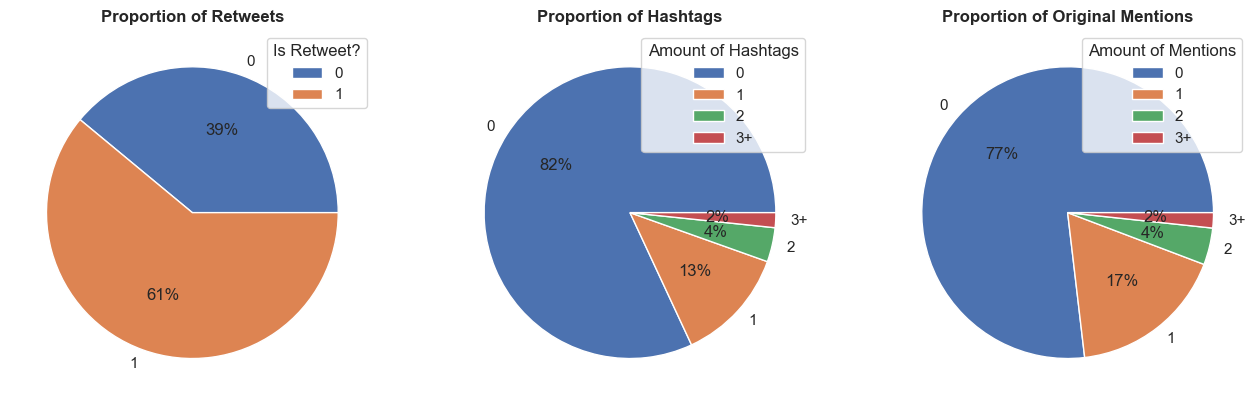

In [89]:
# Create a subset of figures
fig, axs = plt.subplots(1,3, figsize=(16,9))

# Plot pie graph showing retweet distribution
df_eda.groupby(['is_retweet']).count().plot( ax = axs[0], kind = 'pie', y='message', autopct='%1.0f%%' )
axs[0].set_ylabel('')
axs[0].legend(title = "Is Retweet?")
axs[0].set_title("Proportion of Retweets", fontweight = 'bold')


# Function to make hashtag and mention count neat for pie chart
def modify_count(count):
    if count >=3:
        return "3+"
    else:
        return str(count)

# Apply function for hashtags:
df_eda['pretty_plot_hashtag'] = df_eda["hashtag_count"].apply(modify_count, 1)

# Apply function for mentions
df_eda['pretty_plot_mention'] = df_eda["mention_count"].apply(modify_count, 1)

# Plot pie graph showing hashtag distribution
df_eda.groupby(['pretty_plot_hashtag']).count().plot( ax = axs[1], kind = 'pie', y='message', autopct='%1.0f%%' )
axs[1].set_ylabel('')
axs[1].legend(title = "Amount of Hashtags")
axs[1].set_title("Proportion of Hashtags", fontweight = 'bold')

# Plot pie graph showing mention distribution
df_eda.groupby(['pretty_plot_mention']).count().plot( ax = axs[2], kind = 'pie', y='message', autopct='%1.0f%%' )
axs[2].set_ylabel('')
axs[2].legend(title = "Amount of Mentions")
axs[2].set_title("Proportion of Original Mentions", fontweight = 'bold')

We see that a staggering $60\%$ of all our data is not original tweets, but retweets! This indicates that extracting more information from the retweets could prove integral to optimizing our model's predictive capabilities. 

Furthermore, we see that $82\%$ of our data contains no hashtags. While the hashtags that is being used could still provide a great starting point for the model, most of the data does not contain hashtags and as such, this feature might prove less useful than one might hope. 

Lastly, let's consider the mentions. For our purposes, we only look at original mentions, meaning that we don't consider handles that gets retweeted to count towards the total. We see that even though the majority of data does not contain original mentions, there still exist a substantial amount within our data, and will therefore be important to consider within our model.

Let's break the above statistics down by category, to see if there exist certain trends within the sentiment groups that could help us with identifying them: 

Text(0.5, 1.0, 'Average Mentions per Tweet per Sentiment Group')

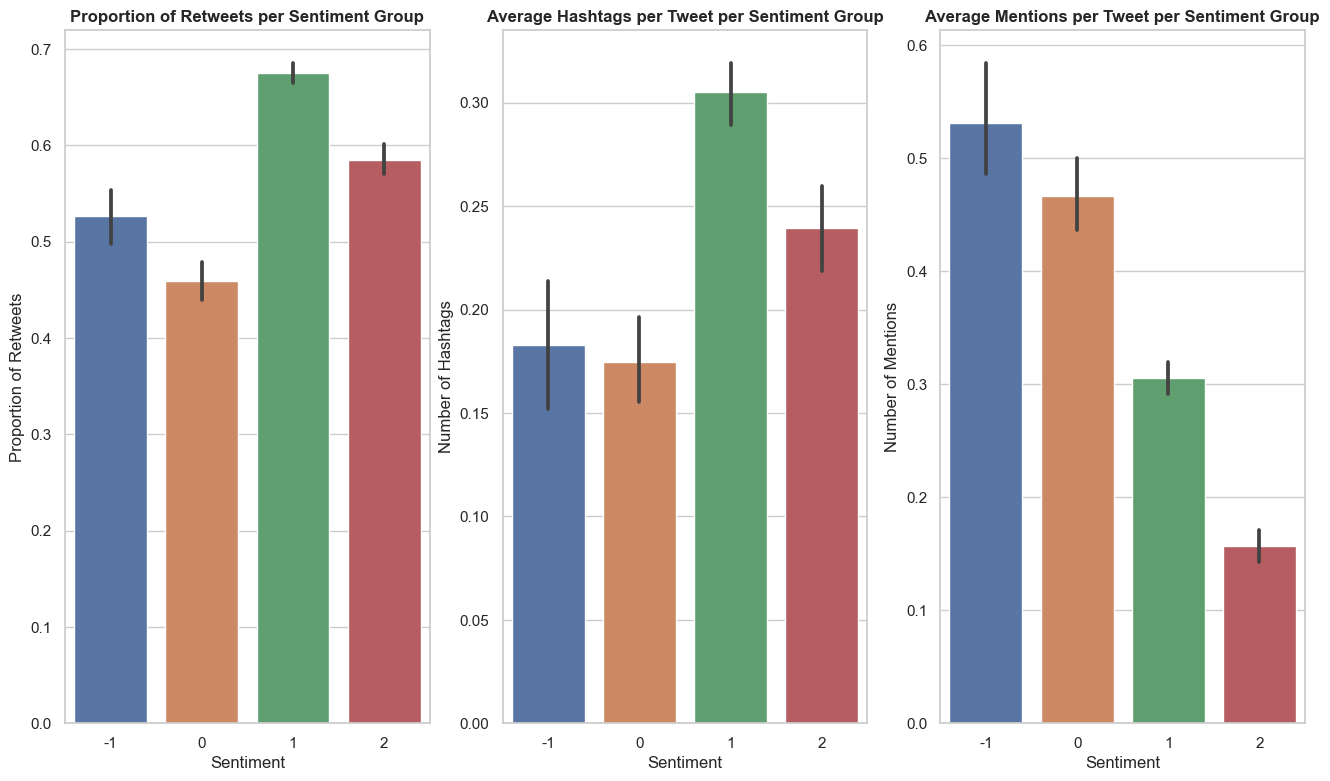

In [90]:
# Create a grid of figures
fig, axs = plt.subplots(1,3,figsize=(16,9))

# Plot retweet distribution
sns.barplot(ax = axs[0] ,data=df_eda, x="sentiment", y="is_retweet")
axs[0].set_ylabel('Proportion of Retweets')
axs[0].set_xlabel("Sentiment")
axs[0].set_title("Proportion of Retweets per Sentiment Group", fontweight = 'bold')

# Plot hashtag distribution
sns.barplot(ax = axs[1] ,data=df_eda, x="sentiment", y="hashtag_count")
axs[1].set_ylabel('Number of Hashtags')
axs[1].set_xlabel("Sentiment")
axs[1].set_title("Average Hashtags per Tweet per Sentiment Group", fontweight = 'bold')

# Plot mentions distribution
sns.barplot(ax = axs[2] ,data=df_eda, x="sentiment", y="mention_count")
axs[2].set_ylabel('Number of Mentions')
axs[2].set_xlabel("Sentiment")
axs[2].set_title("Average Mentions per Tweet per Sentiment Group", fontweight = 'bold')


First, let us consider the proportion of tweets that are retweets for each individual sentiment. We see that in our dataset, the people with a pro-climate change outlook has the highest proportion of retweets of any group, with news tweets from the media coming in a close second. Even though the differences between these categories isn't that big, it still captures a substantial effect, and it would be beneficial to include retweets within the model. 

Next, we consider the average number of hashtags contained within the tweets. Here, we find a vast difference between certain categories. Once again, the group expressing pro-climate change sentimentalities uses the most number of hashtags, followed closely by factual news tweets. The neutral and anti-climate change categories are far less likely to use hashtags in their tweets, since they use fewer hashtags on average

Finally, we consider the amount of original mentions for each group. Remember, we define _original mentions_ to be any mentions contained within tweets after the retweet handle was removed, i.e. it refers to mentions within tweets, but disregards retweet handles from the list. Here, we see a surprising trend. The anti-climate change group uses the most amount of mentions per tweet- substantially more than the pro-climate change group and more than double that of the factual news tweets. 

All of the features above identify valuable differences between the classes, and as such, should be included within the model.

Let's break it down a bit further, and dive deeper into the most popular retweets, hashtags and mentions per category. First, let's manipulate the data into a more usable form in order to help us draw word clouds. First, we split our dataframe into multiple dataframes based on the sentiment we wish to investigate:

In [91]:
# Filter Anti-Climate change sentiment
df_eda_anti = df_eda[df_eda["sentiment"] ==  -1]
# Filter neutral sentiment
df_eda_neutral = df_eda[df_eda["sentiment"] ==  0]
# Filter Pro-Climate change sentiment
df_eda_pro = df_eda[df_eda["sentiment"] ==  1]
# Filter factual news sentiment
df_eda_news = df_eda[df_eda["sentiment"] ==  2]


_The following cell might take some time to run (~3 mins). Creating wordclouds is timely :)_

We start with looking at the most common retweeted handles for each category: 

(-0.5, 1599.5, 1599.5, -0.5)

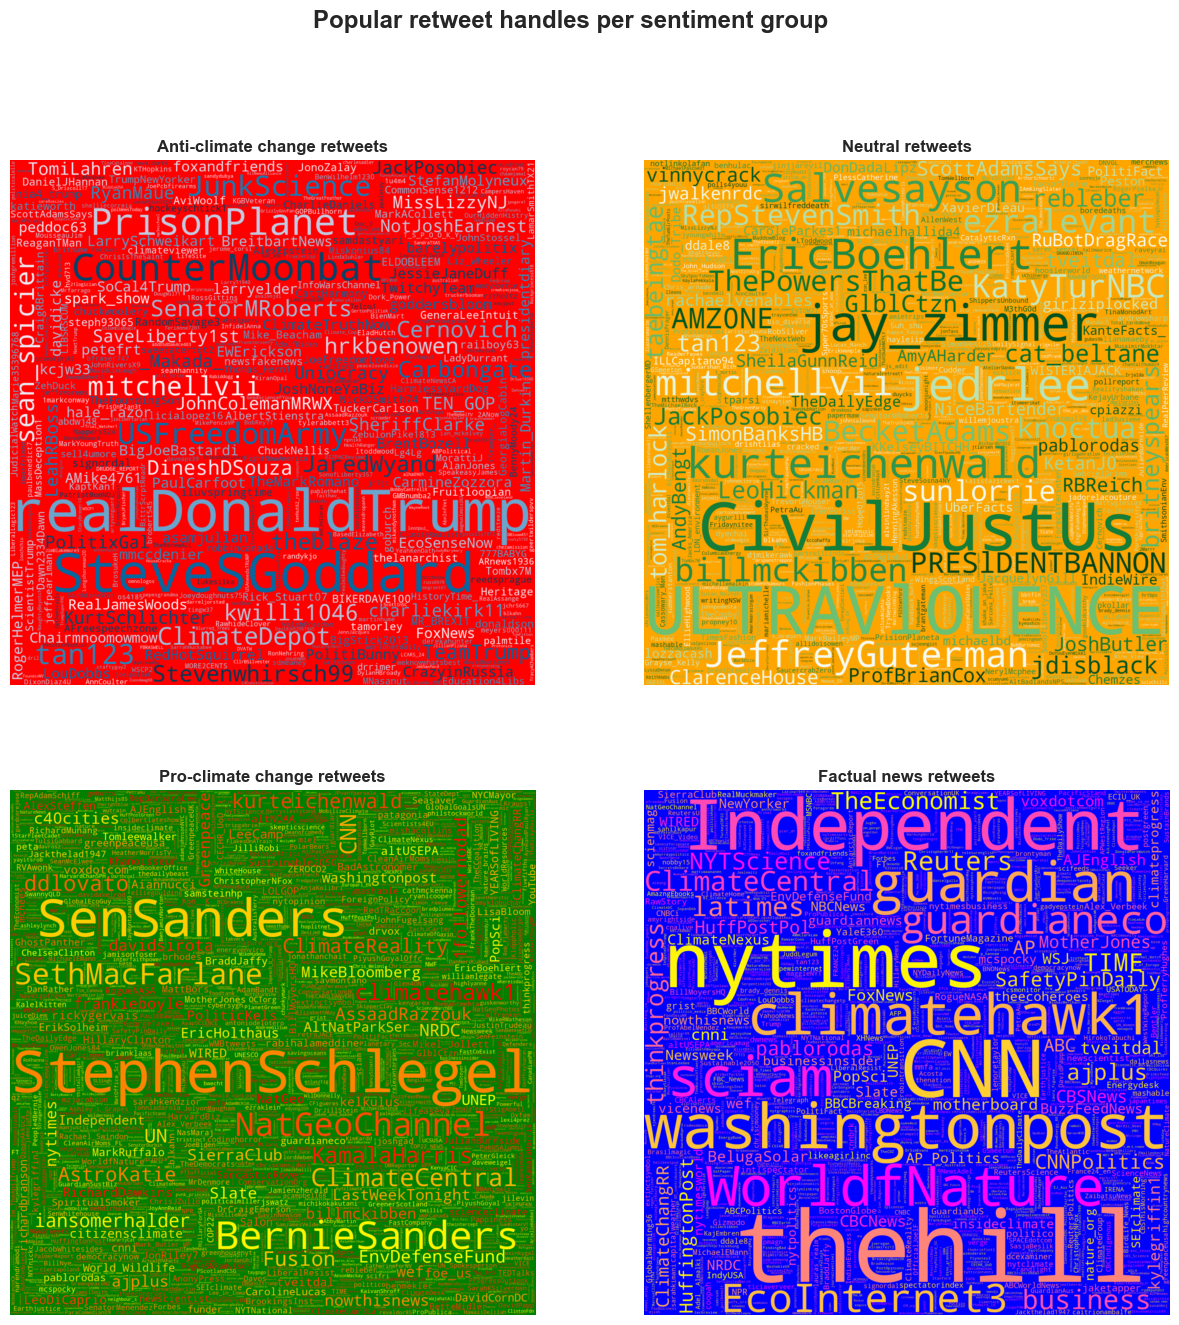

In [92]:
# Create word strings containing retweet handles for each sentiment
word_string_anti=" ".join(df_eda_anti['retweet_handle'])
word_string_neutral=" ".join(df_eda_neutral['retweet_handle'])
word_string_pro=" ".join(df_eda_pro['retweet_handle'])
word_string_news=" ".join(df_eda_news['retweet_handle'])

# Create a new figure
plt.figure(figsize=(15,15))

plt.suptitle("Popular retweet handles per sentiment group", fontweight='bold', fontsize = "x-large")
# Plot anti-climate change sentiments
plt.subplot(2,2,1).set_title("Anti-climate change retweets", fontweight = 'bold')
wc = WordCloud(background_color="red", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_anti)
plt.imshow(wc.recolor( colormap= 'PuBu' , random_state=17), interpolation="bilinear")
plt.axis('off')

# Plot neutral sentiments
plt.subplot(2,2,2).set_title("Neutral retweets", fontweight = 'bold')
wc = WordCloud(background_color="orange", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_neutral)
plt.imshow(wc.recolor( colormap= 'Greens' , random_state=17), interpolation="bilinear")
plt.axis('off')

# Plot pro-climate change sentiments
plt.subplot(2,2,3).set_title("Pro-climate change retweets", fontweight = 'bold')
wc = WordCloud(background_color="green", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_pro)
plt.imshow(wc.recolor( colormap= 'autumn' , random_state=17), interpolation="bilinear")
plt.axis('off')

# Plot pro-climate change sentiments
plt.subplot(2,2,4).set_title("Factual news retweets", fontweight = 'bold')
wc = WordCloud(background_color="blue", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_news)
plt.imshow(wc.recolor( colormap= 'spring' , random_state=17), interpolation="bilinear")
plt.axis('off')

From the above, we see a clear difference between every sentiment with regards to who they are retweeting. This is great news, since it will provide an excellent feature within our model. Little overlap between categories is visible, which points to the fact that this feature could be a very strong predictor.

We see that people with anti-climate change sentiments retweets from users like `@realDonaldTrump` and `@SteveSGoddard` the most. Overall retweets associated with anti-climate science opinions are frequently sourced from prominent Republican figures such as Donald Trump, along with individuals who identify as climate change deniers, like Steve Goddard.

In contrast to this, people with pro-climate change views often retweet Democratic political figures such as `@SenSanders` and `@KamalaHarris`. Along with this, we see a trend to retweet comedians like `@SethMacFarlane`. The most retweeted individual for this category, is `@StephenSchlegel`. 

Retweets in the factual news category mostly contains handles of media news organizations, like `@thehill`, `@CNN`, `@wasgingtonpost` etc...

People with neutral sentiments regarding climate change seems to not retweet overtly political figures. Instead, they retweet handles unknown to the writer like `@CivilJustUs` and `@ULTRAVIOLENCE` which no longer currently exist on twitter. The comedian `@jay_zimmer` is also a common retweeted incividual within this category.

By repeating the steps above, we can now turn our attention to the different hashtags popular within each category:

(-0.5, 1599.5, 1599.5, -0.5)

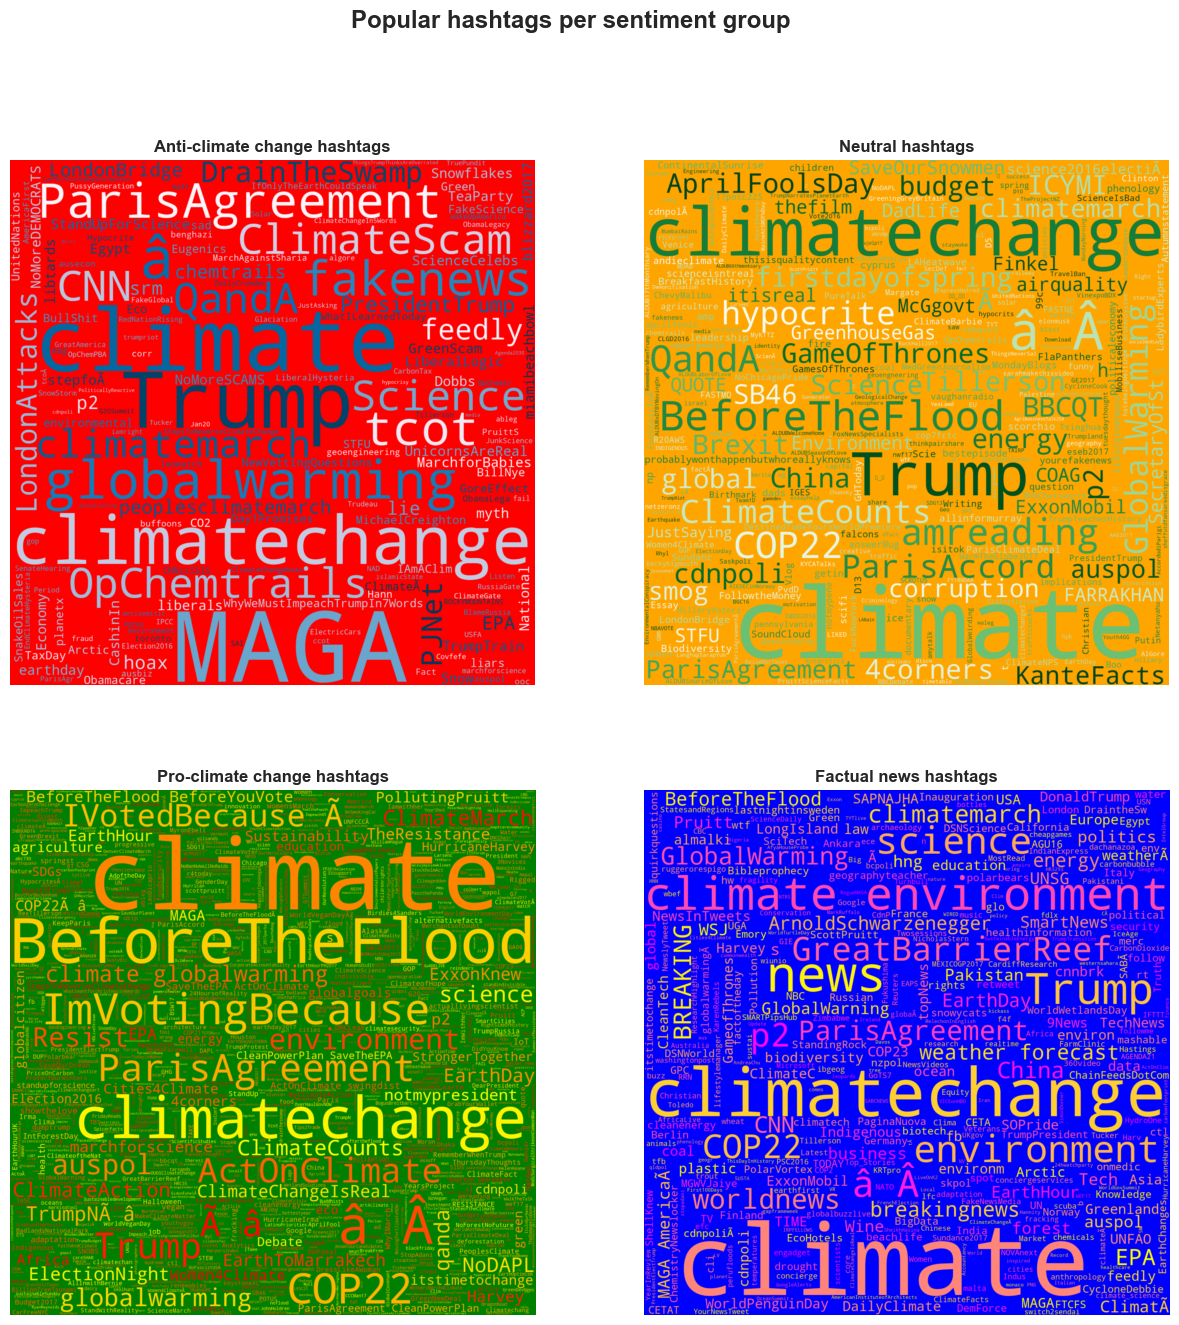

In [93]:
# Create word strings containing retweet handles for each sentiment
word_string_anti=" ".join(df_eda_anti['hashtags'])
word_string_neutral=" ".join(df_eda_neutral['hashtags'])
word_string_pro=" ".join(df_eda_pro['hashtags'])
word_string_news=" ".join(df_eda_news['hashtags'])

# Create a new figure
plt.figure(figsize=(15,15))
plt.suptitle("Popular hashtags per sentiment group", fontweight='bold', fontsize = "x-large")

# Plot anti-climate change sentiments
plt.subplot(2,2,1).set_title("Anti-climate change hashtags", fontweight = 'bold')
wc = WordCloud(background_color="red", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_anti)
plt.imshow(wc.recolor( colormap= 'PuBu' , random_state=17), interpolation="bilinear")
plt.axis('off')

# Plot neutral sentiments
plt.subplot(2,2,2).set_title("Neutral hashtags", fontweight = 'bold')
wc = WordCloud(background_color="orange", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_neutral)
plt.imshow(wc.recolor( colormap= 'Greens' , random_state=17), interpolation="bilinear")
plt.axis('off')

# Plot pro-climate change sentiments
plt.subplot(2,2,3).set_title("Pro-climate change hashtags", fontweight = 'bold')
wc = WordCloud(background_color="green", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_pro)
plt.imshow(wc.recolor( colormap= 'autumn' , random_state=17), interpolation="bilinear")
plt.axis('off')

# Plot pro-climate change sentiments
plt.subplot(2,2,4).set_title("Factual news hashtags", fontweight = 'bold')
wc = WordCloud(background_color="blue", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_news)
plt.imshow(wc.recolor( colormap= 'spring' , random_state=17), interpolation="bilinear")
plt.axis('off')

From the visual above, we notice a few things:

First of all, there is some strange characters in our data, like `#Ã â` and `#â Â` for example. This is considered noise, and will need to be removed before training our models. 

We see that a lot of hashtags are common in every sentiment category. Hashtags like `#climatechange`, `#cllimate` and `#Trump` is abundant regardless of which category is considered, and can therefore be removed from the list of hashtags since they won't contribute any meaningful insight to our models. 

Finally there is some hashtags that are more prominent within certain sentiment groups. Take `#MAGA` and `#fakenews` in the anti-climate change category, or `#ImVotingBecause` in the pro-climate change category. This indicates that some useful information can be extracted from this feature, and should remain within the model.

Let's repeat the process one last time in order to investigate the original mentions in each category

(-0.5, 1599.5, 1599.5, -0.5)

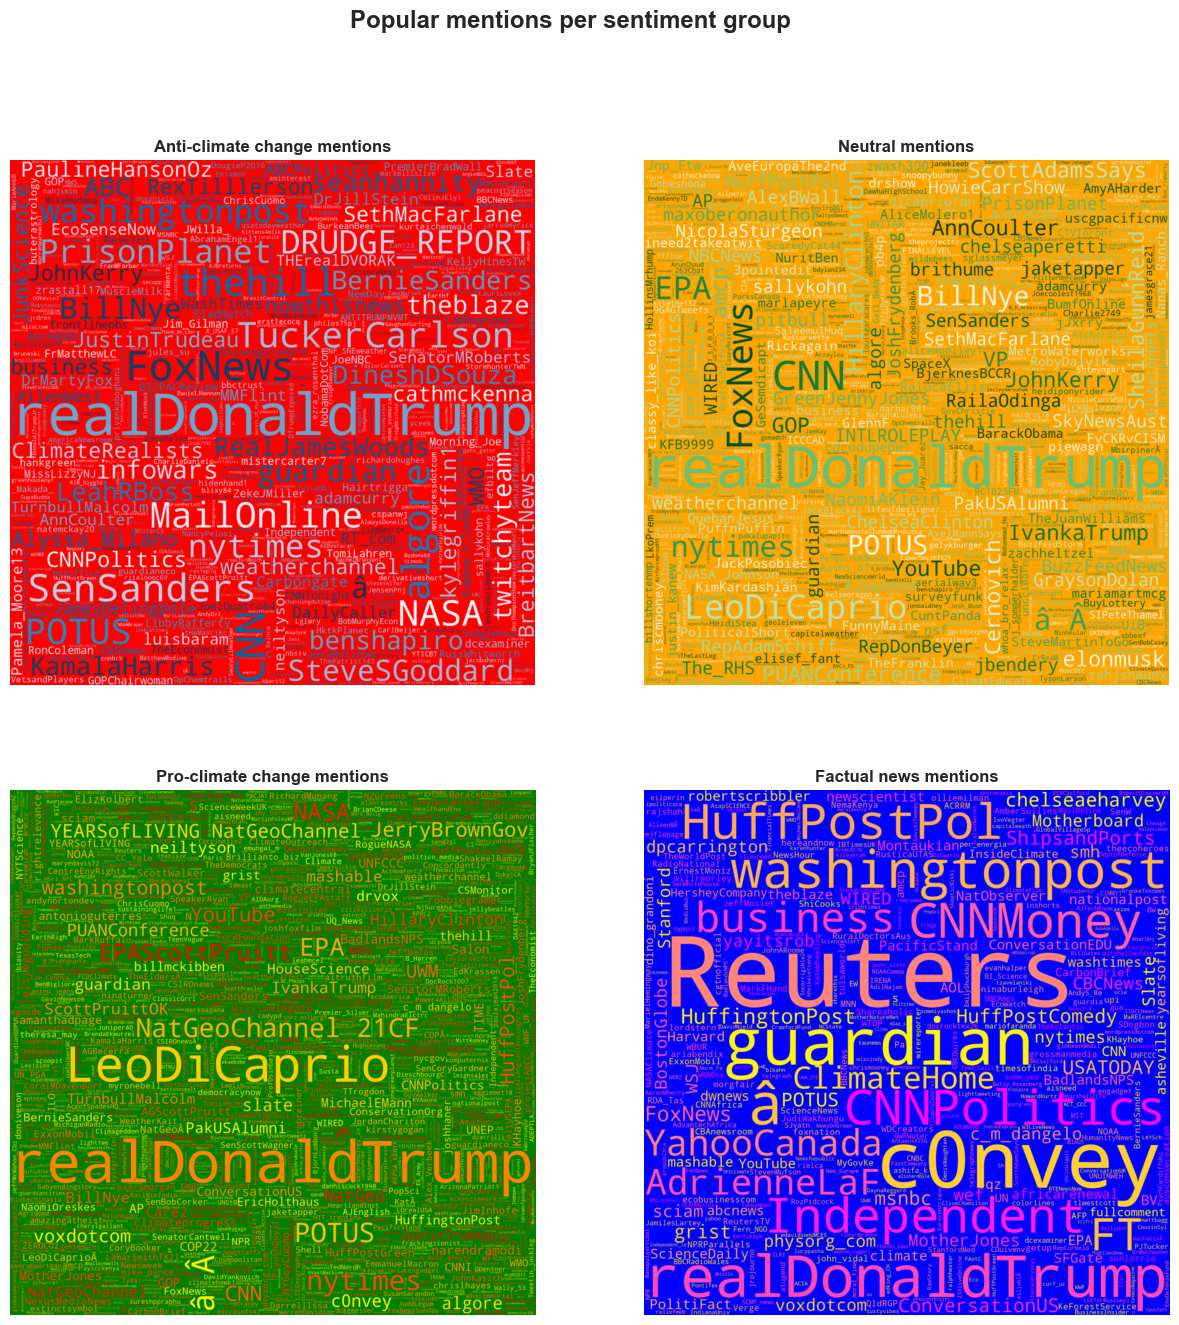

In [94]:
# Create word strings containing retweet handles for each sentiment
word_string_anti=" ".join(df_eda_anti['mentions'])
word_string_neutral=" ".join(df_eda_neutral['mentions'])
word_string_pro=" ".join(df_eda_pro['mentions'])
word_string_news=" ".join(df_eda_news['mentions'])

# Create a new figure
plt.figure(figsize=(15,15))
plt.suptitle("Popular mentions per sentiment group", fontweight='bold', fontsize = "x-large")

# Plot anti-climate change sentiments
plt.subplot(2,2,1).set_title("Anti-climate change mentions", fontweight = 'bold')
wc = WordCloud(background_color="red", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_anti)
plt.imshow(wc.recolor( colormap= 'PuBu' , random_state=17), interpolation="bilinear")
plt.axis('off')

# Plot neutral sentiments
plt.subplot(2,2,2).set_title("Neutral mentions", fontweight = 'bold')
wc = WordCloud(background_color="orange", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_neutral)
plt.imshow(wc.recolor( colormap= 'Greens' , random_state=17), interpolation="bilinear")
plt.axis('off')

# Plot pro-climate change sentiments
plt.subplot(2,2,3).set_title("Pro-climate change mentions", fontweight = 'bold')
wc = WordCloud(background_color="green", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_pro)
plt.imshow(wc.recolor( colormap= 'autumn' , random_state=17), interpolation="bilinear")
plt.axis('off')

# Plot pro-climate change sentiments
plt.subplot(2,2,4).set_title("Factual news mentions", fontweight = 'bold')
wc = WordCloud(background_color="blue", max_words=2000, max_font_size= 300,  width=1600, height=1600)
wc.generate(word_string_news)
plt.imshow(wc.recolor( colormap= 'spring' , random_state=17), interpolation="bilinear")
plt.axis('off')

As was the case when we considered hashtags, we see that some handles get mentioned regardless of sentiment class. An example of this is `@realDonaldTrump`, which is prominent in every sentiment category, and as such should be removed before training our models, since it adds no value towards our data. 

Furthermore, there is some mentions that are more prominent in certain classes than others. Take `@LeoDiCaprio` for example, which features heavily in both pro-climate change as well as neutral towards climate change sentiment, but is not represented in the other two categories. This indicates that this feature could be beneficial for categorizing our data, and should remain within the dataset





Let's investigate if there exist more features that could help identify the category a tweet belongs to.

 Looking at our data, we see that a lot of tweets contains links to external websites in the form of _https://t.somecharactershere_. It is very difficult to extract the context of the website in this form, since it is only a collection of random characters. We can however count the amount of websites within each tweet, and try to use that as a metric.

 Furthermore, we see that some tweets contain emojis. We can translate these emojis to text for when we train our model, so that it gets processed along with the words contained in the tweet. We can also count the amount of emojis within the tweet, and attempt to use that as a metric. 

 Some of the tweets in our dataset also has some newline characters within, changing how the tweet is presented on the website. We could also attempt to use this as a metric for our models, by counting the amount of newlines within each tweet. 

 Lastly, we can attempt to quantify the emotions within a tweet by checking if swear words are present within a tweet, as well as the amount of exclamation marks the tweet contains. To consider the amount of swear words, we make use of _The Obscenity List_, compiled by surge AI available [here](https://github.com/surge-ai/profanity)

 We can make some functions to do the above, which we can apply to our data:

In [95]:
# Count number of web links within tweet
def count_links(tweet):
    count = tweet.count("https:")
    return count

# Count number of emojis within tweet:
def count_emoji(tweet):
    emoji_counter = emoji.emoji_count(tweet)
    return emoji_counter


# Count number of newlines within tweet:
def enter_count(tweet):
    count = tweet.count('\n')
    return count


# Count number of exclamation marks within tweet:
def exclamation_count(tweet):
    count = tweet.count('!')
    return count

# Create a list of curse words contained in the accompanying csv file

df_cursewords = pd.read_csv("profanity_en.csv")
cursewords = list(df_cursewords.text)


# Count number of profanities in tweet:
def curse_count(tweet):
    count = 0
    tweet = tweet.lower()
    wordlist = tweet.split()
    for word in wordlist:
        if word in cursewords:
            count += 1

    return count



Lets create the new features by applying the functions above to our dataset: _(Looking through all the text for profanity might take a minute or two)_

In [96]:
# Get number of links
df_eda["link_count"] = df_eda["message"].apply(count_links, 1)

# Get number of emojis
df_eda["emoji_count"] = df_eda["message"].apply(count_emoji, 1)

# Get number of newlines
df_eda["newline_count"] = df_eda["message"].apply(enter_count, 1)

# Get number of exclamation marks
df_eda["exclamation_count"] =  df_eda["message"].apply(exclamation_count, 1)

# Check if tweet contains profanity:
df_eda["profanity_count"] = df_eda["message"].apply(curse_count, 1)

#check that new features were created
df_eda.head(10)

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
5          1  Worth a read whether you do or don't believe i...   425577   
6          1  RT @thenation: Mike Pence doesn’t believe in g...   294933   
7          1  RT @makeandmendlife: Six big things we can ALL...   992717   
8          1  @AceofSpadesHQ My 8yo nephew is inconsolable. ...   664510   
9          1  RT @paigetweedy: no offense… but like… how do ...   260471   

   is_retweet    retweet_handle  hashtag_count         hashtags  \
0           0                                0                    
1           0                                0                    
2           1         @RawStory              0                    
3           0                                1   #TodayinMaker#   
4           1  @SoyNovioDeTodas              1   #ElectionNight   
5           0                                0                    
6           1        @thenation              0                    
7           1  @makeandmendlife              0                    
8           0                                0                    
9           1      @paigetweedy              0                    

   mention_count         mentions pretty_plot_hashtag pretty_plot_mention  \
0              1        @mashable                   0                   1   
1              0                                    0                   0   
2              0                                    0                   0   
3              0                                    1                   0   
4              0                                    1                   0   
5              0                                    0                   0   
6              0                                    0                   0   
7              0                                    0                   0   
8              1   @AceofSpadesHQ                   0                   1   
9              0                                    0                   0   

   link_count  emoji_count  newline_count  exclamation_count  profanity_count  
0           1            0              0                  1                0  
1           0            0              0                  0                0  
2           2            0              0                  0                0  
3           1            0              0                  0                0  
4           0            0              0                  0                0  
5           2            0              0                  0                0  
6           1            0              0                  0                0  
7           1            0              0                  0                0  
8           0            0              0                  0                0  
9           0            0              0                  0                0

Let's break these newly created features down by sentiment, to see if they could provide some insights into our data:

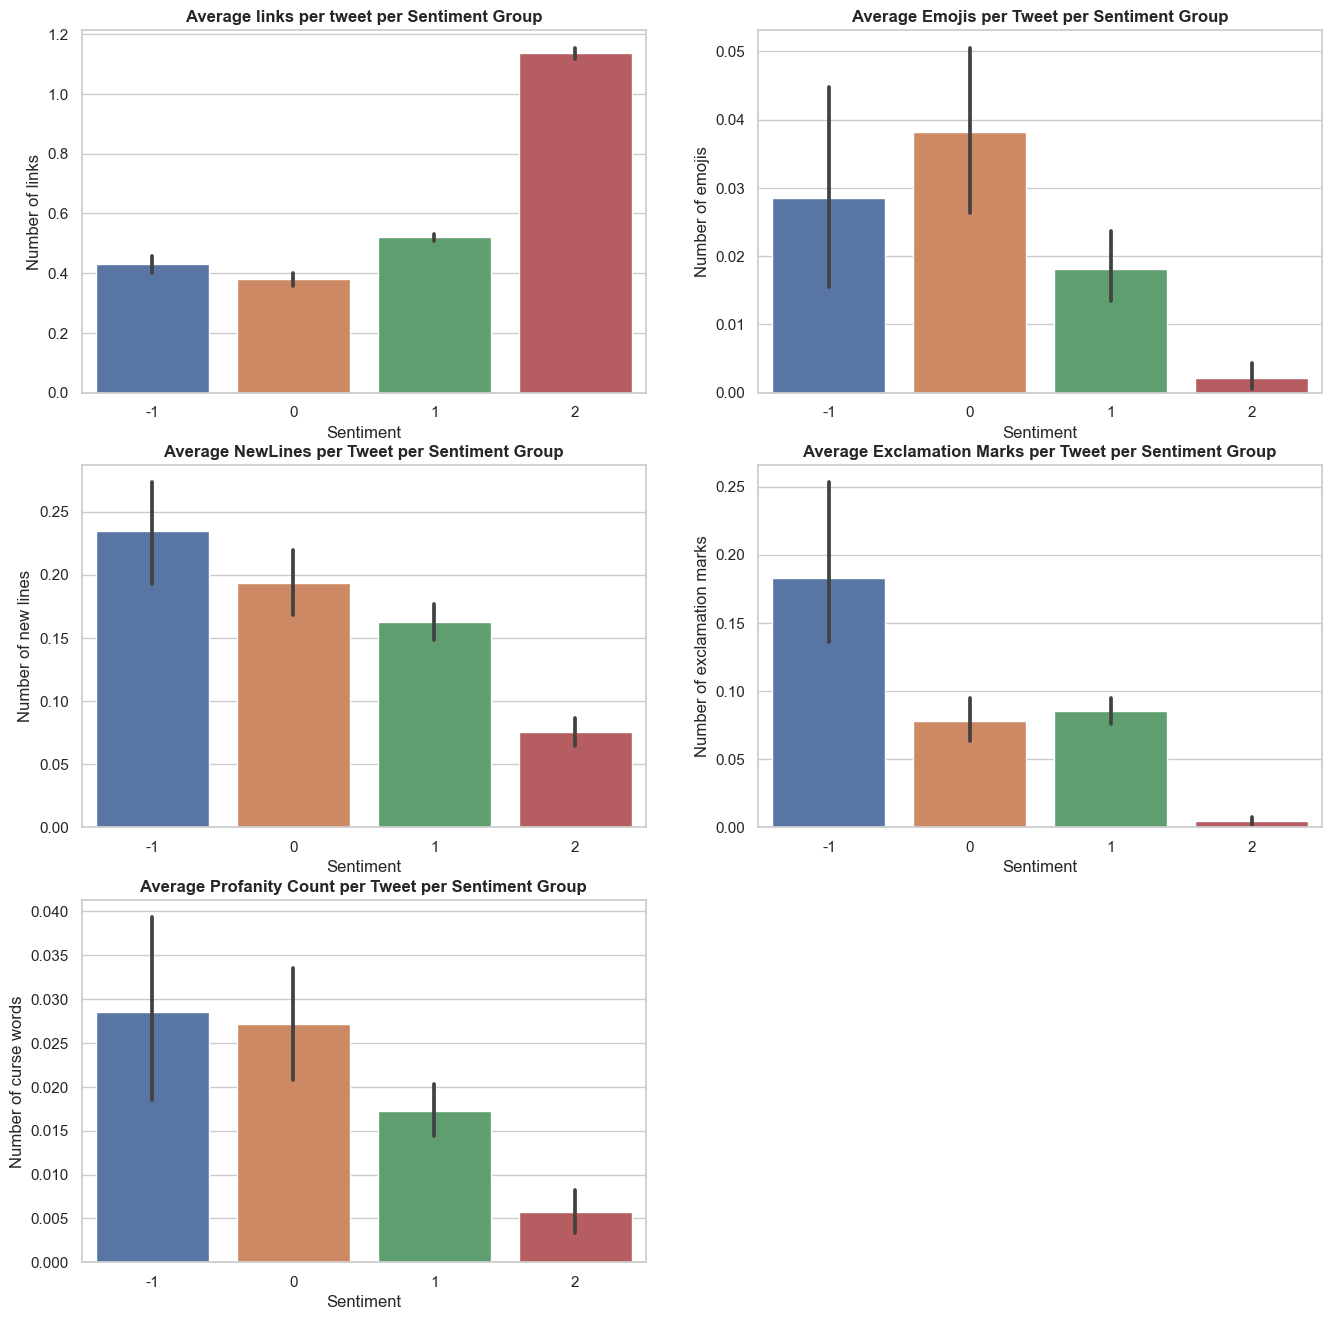

In [97]:
fig, axs = plt.subplots( 3, 2, figsize=(16,16))

# Plot link distribution
sns.barplot(ax = axs[0][0] , data=df_eda, x="sentiment", y="link_count")
axs[0][0].set_ylabel('Number of links')
axs[0][0].set_xlabel("Sentiment")
axs[0][0].set_title("Average links per tweet per Sentiment Group", fontweight = 'bold')

# Plot emoji distribution
sns.barplot(ax = axs[0][1] , data=df_eda, x="sentiment", y="emoji_count")
axs[0][1].set_ylabel('Number of emojis')
axs[0][1].set_xlabel("Sentiment")
axs[0][1].set_title("Average Emojis per Tweet per Sentiment Group", fontweight = 'bold')

# Plot newline distribution
sns.barplot(ax = axs[1][0] , data=df_eda, x="sentiment", y="newline_count")
axs[1][0].set_ylabel('Number of new lines')
axs[1][0].set_xlabel("Sentiment")
axs[1][0].set_title("Average NewLines per Tweet per Sentiment Group", fontweight = 'bold')

# Plot exclamation mark distribution
sns.barplot(ax = axs[1][1] , data=df_eda, x="sentiment", y="exclamation_count")
axs[1][1].set_ylabel('Number of exclamation marks')
axs[1][1].set_xlabel("Sentiment")
axs[1][1].set_title("Average Exclamation Marks per Tweet per Sentiment Group", fontweight = 'bold')

# Plot profanity distribution
sns.barplot(ax = axs[2][0] , data=df_eda, x="sentiment", y="profanity_count")
axs[2][0].set_ylabel('Number of curse words')
axs[2][0].set_xlabel("Sentiment")
axs[2][0].set_title("Average Profanity Count per Tweet per Sentiment Group", fontweight = 'bold')

axs[2][1].set_axis_off()

The image above contains a lot of information about our data. Let's break it down by feature.

First, we consider the average amount of links per tweet. We see that tweets containing factual news about climate change in our dataset contains a lot more links on average than any other category in the data. Within the other categories, not much variation exist when considering this feature. This feature might help us to predict factual news tweets, and as such, should be used when building our models.

Next, we look at the amount of emojis per tweet. We see that factual news tweets contains very little emojis, while people with neutral sentiments use the most. The amount of emojis in our data is very little, however, and does not contribute to the vast majority of data. As such, we might neglect the `emoji_count` feature, and instead translate the emojis to text, which will be used by the model. 

Considering the amount of new paragraphs (or newlines) in the data, we find that people expressing anti-climate change sentiments use the newline character the most to space out their tweets, whilst the factual news tweets contains the least amount of average newlines for any sentiment group. This feature seems to contribute to the amount of information contained within the data, and should therefore be used when training our models.

A surprising feature that emerged, is that of the average amount of exclamation marks per tweet. People expressing anti-climate change sentiments use this character more that twice the amount of those possessing neutral and pro-climate change sentiments. Futhermore, factual news tweets almost never contain exclamation marks. This is an excellent feature to include when training our models

Lastly, we consider the profanity contained within tweets. As expected, factual news tweets contained the least amount of average profanity per tweet form any group. People maintaining anti-climate change views uses the most of any group, followed closely by people that are neutral to th issue of climate-change. Again, as was the case for emojis, the amount of profanity in the data is very low, and as such, we can neglect the `profanity_count` feature when training our models.


For our last consideration within the EDA, let's look at the most common words found within the dataset. First, we need to clean the data to remove some things from consideration. We start by converting all of the words to lowercase so that capitalization no longer differentiates between words:

In [98]:
# Transform tweets into lowercase versions of tweets:
def lowercase(tweet):
    return tweet.lower()
df_eda["message"] = df_eda['message'].apply(lowercase)




Next, we replace all URLs within the data with a common alias:

In [99]:
# Replace URLs within the dataframe
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_eda['message'] = df_eda['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)




Since we have already looked at retweets, mentions and hashtags, we remove them from consideration for now:

In [130]:
# Remove handles from tweet:
def remove_handles(tweet):
    wordlist = tweet.split()
    for word in wordlist:
        if word[0] == '@':
            wordlist.remove(word)
    returnstr = ''
    for word in wordlist:
        returnstr += word + " "
    return returnstr

# Remove handles from tweet:
def remove_hashtags(tweet):
    wordlist = tweet.split()
    for word in wordlist:
        if word[0] == '#':
            wordlist.remove(word)
    returnstr = ''
    for word in wordlist:
        returnstr += word + " "
    return returnstr

# Remove RT from tweet:
def remove_rt(tweet):
    wordlist = tweet.split()
    for word in wordlist:
        if word == 'rt' or word=='RT':
            wordlist.remove(word)
    returnstr = ''
    for word in wordlist:
        returnstr += word + " "
    return returnstr

Applying these functions to our dataset:

In [101]:
# Remove hashtags, handles and retweets form the data
df_eda["message"] = df_eda['message'].apply(remove_handles)
df_eda["message"] = df_eda['message'].apply(remove_hashtags)
df_eda["message"] = df_eda['message'].apply(remove_rt)

Next, we remove all common stopwords form the data, as they will not provide meaningful insights:

In [102]:
# Remove common english stop words from the data
def remove_stop_words(tweet):
    words = tweet.split()     
    return ' '.join([t for t in words if t not in stopwords.words('english')])

# Apply function to the data:
df_eda["message"] = df_eda['message'].apply(remove_stop_words)

Lastly, we remove all punctuation from the tweets, so that we are left with only words:

In [103]:
# Showing the punctuation to be removed
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [104]:
# Remove punctuation from tweets:
def remove_punctuation(tweet):
    return ''.join([l for l in tweet if l not in string.punctuation])

# Apply function to data
df_eda["message"] = df_eda['message'].apply(remove_punctuation)

Writing a function to count the amount of words present within the data:

In [105]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

We can apply that to the data. First, let's look at the most common words over the whole dataset:

In [106]:
# Join all tweets within one string variable
all_tweets = " ".join(df_eda["message"])

# Split tweets into list of words
word_list = all_tweets.split()

# Count words in dataset
word_count = {}
bag_of_words_count(word_list, word_count)

# Sort dictionary on word count
word_count = sorted(word_count.items(), key=lambda x:x[1], reverse=True)

print(word_count)

[('climate', 12555), ('change', 12211), ('urlweb', 8028), ('global', 3761), ('warming', 3413), ('trump', 1864), ('believe', 1154), ('urlweb…', 1027), ('us', 891), ('amp', 872), ('real', 682), ('going', 670), ('world', 634), ('people', 600), ('urlwebã¢â‚¬â¦', 588), ('new', 538), ('via', 515), ('epa', 514), ('fight', 468), ('says', 429), ('like', 428), ('die', 418), ('science', 413), ('scientists', 408), ('donald', 383), ('hoax', 382), ('say', 366), ('think', 360), ('https…', 357), ('thinking', 353), ('trumps', 343), ('president', 336), ('husband', 317), ('could', 301), ('need', 299), ('one', 285), ('know', 282), ('action', 275), ('china', 270), ('make', 269), ('right', 262), ('would', 257), ('years', 253), ('thinks', 248), ('im', 246), ('news', 246), ('stop', 245), ('energy', 242), ('still', 228), ('cause', 224), ('weather', 223), ('must', 221), ('pruitt', 219), ('due', 218), ('time', 216), ('presidentelect', 213), ('chinese', 212), ('scott', 212), ('get', 211), ('want', 210), ('planet'

Let's plot the 20 most occurring words:

<AxesSubplot:title={'center':'Count of most occurring words'}, ylabel='Word'>

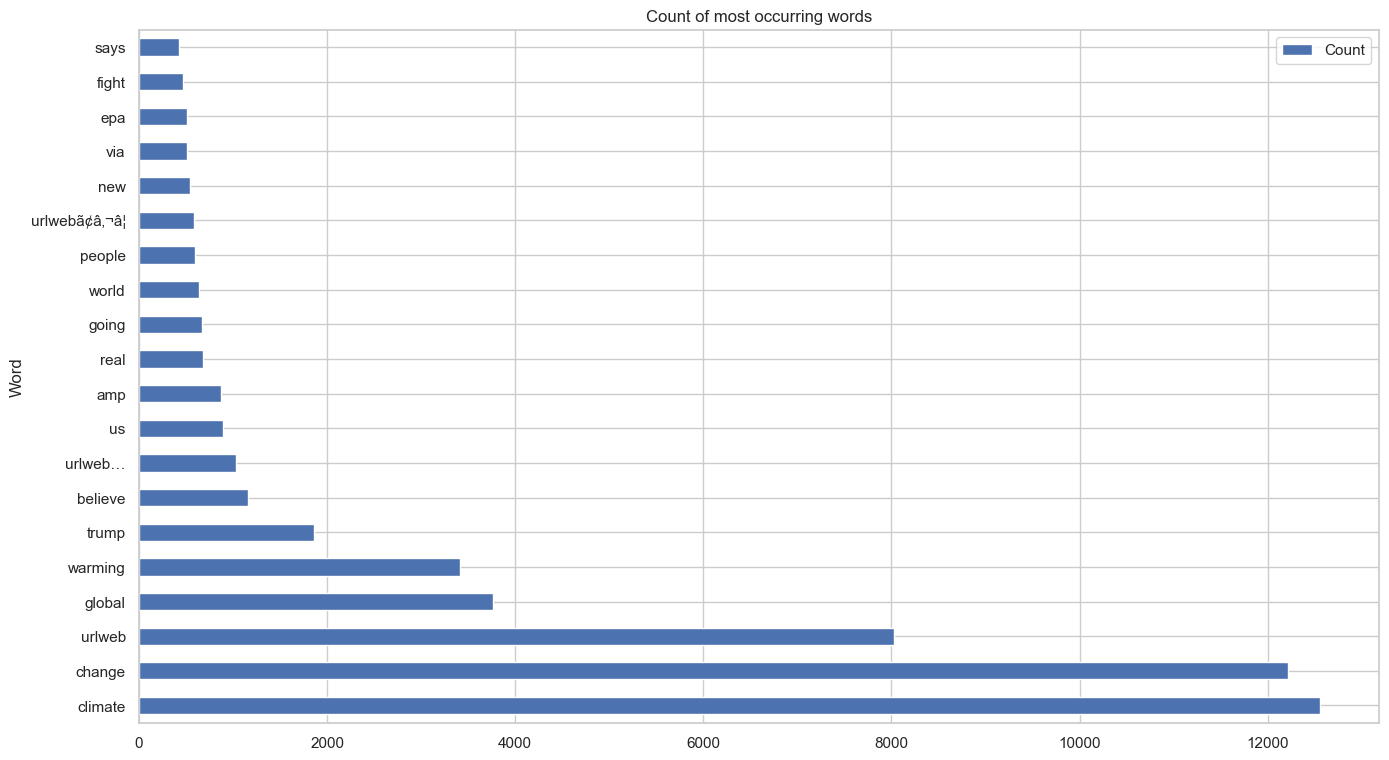

In [107]:
# Put word counts into dataframe
df_wordcount = pd.DataFrame(word_count, columns=["Word", "Count"])

# Select 15 most occurring words
df_to_plot = df_wordcount.head(20)

df_to_plot.plot(x="Word", kind='barh', title="Count of most occurring words", figsize=(16,9) )

From the above, we nota a few things: 

Most obviously, the most occuring word in the dataset is `climate`, followed closely by `change`. We see that other keywords such as `global` and `warming` also occurs very often, as does `trump`. 

Furthermore, we have a lot of links within the data. We see that we can improve on cleaning these links, since we see 3 categories of counts that all pertain to links posted. When training the model, we should attempt to remove more of the strange characters surrounding words

Let's investigate what words appear in the data only once:

In [108]:
# Amount of rare words
rare_words = df_wordcount[df_wordcount["Count"] == 1]
print(len(rare_words), " words appear only once in our data, which is ", round(len(rare_words)/len(word_count)*100, 2), "% of all words in the dataset")

# Print 100 examples of rare words
print(list(rare_words["Word"])[:100])

10842  words appear only once in our data, which is  56.97 % of all words in the dataset
['polyscimajor', 'lung', 'activistã¢â‚¬â¦', '8yo', 'nephew', 'inconsolable', 'perish', 'fiery', 'hellscape', 'offense…', 'like…', 'warming………', 'vocal', 'powering', '‘misled’', '����️��', 'zaynmalik', 'healthcare…', 'reunitingish', 'cast', 'rting', 'c40', '250m', 'michaels', 'vetted', 'bgr', 'aquifers', 'amts', '“unproven”', 'we’', 'dealt', 'protested', 'nba', 'finals', 'cronie', 'mph', 'charm', 'initially', 'thinked', 'europeaã¢â‚¬â¦', '🤦\u200d♂️', 'schwarzeneggers', 'maidillegal', 'cylinder', 'stratosphere', 'rpt', 'admins', 'jjxrry', 'quebanjesus', 'conditioner', 'icebreaking', 'opps', 'cv', 'environmentlondongovuk', 'energyenvt', 'refused', 'despit…', 'shake', 'sercs', 'roy', 'buzz', 'fertilization', 'automatic', 'specialist', 'air…', 'alleviating', 'epidemics', '“yet', 'lobbies', '500000', '“universities', 'geologist', 'syfys', 'incorporated', '02', 'trumpstersomg', 'trumpserst', 'idots', 'bas

Since these words constitutes a majority of our dataset, we will keep them when training our models. By translating emojis and cleaning the data better, as well as applying stemming- or lemmatization techniques, we can extract more valuable information from them.

_Include breakdown of most common words by category_

<a id="four"></a>
## 4. Data Engineering and NLP Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

First, to avoid duplicating the operations performed on both the testing and training dataset, we join them together:

In [268]:
# Discard all changes and reload the data
df_train = pd.read_csv('train.csv')
df_evaluate = pd.read_csv('test_with_no_labels.csv')

# Combine the training and testing data
df_combined = pd.concat((df_train, df_evaluate)) 


Next, let's extract the valuable features we identified:

In [269]:
# Get retweet status and handle
df_combined["is_retweet"] = df_combined["message"].apply(is_retweet, 1)
df_combined["retweet_handle"] =  df_combined["message"].apply(get_retweet, 1)

# Get hashtag count and extract hashtags
df_combined["hashtag_count"] = df_combined["message"].apply(count_hashtag, 1)
df_combined["hashtags"] =  df_combined["message"].apply(get_hashtag, 1)

# Get mention count and extract mentions
df_combined["mention_count"] = df_combined["message"].apply(count_mentions, 1)
df_combined["mentions"] =  df_combined["message"].apply(get_mentions, 1)

# Get number of links
df_combined["link_count"] = df_combined["message"].apply(count_links, 1)

# Get number of newlines
df_combined["newline_count"] = df_combined["message"].apply(enter_count, 1)

# Get number of exclamation marks
df_combined["exclamation_count"] =  df_combined["message"].apply(exclamation_count, 1)

df_combined.head()


sentiment                                            message  tweetid  \
0        1.0  PolySciMajor EPA chief doesn't think carbon di...   625221   
1        1.0  It's not like we lack evidence of anthropogeni...   126103   
2        2.0  RT @RawStory: Researchers say we have three ye...   698562   
3        1.0  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4        1.0  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

   is_retweet    retweet_handle  hashtag_count         hashtags  \
0           0                                0                    
1           0                                0                    
2           1         @RawStory              0                    
3           0                                1   #TodayinMaker#   
4           1  @SoyNovioDeTodas              1   #ElectionNight   

   mention_count    mentions  link_count  newline_count  exclamation_count  
0              1   @mashable           1              0                  1  
1              0                       0              0                  0  
2              0                       2              0                  0  
3              0                       1              0                  0  
4              0                       0              0                  0

The next step, is to clean the message contained within the tweet. First, let's remove the retweet and mention handles, as well as the hashtags, since we have extracted that information already into their own features:

In [270]:
# Remove handles from tweet
df_combined["message"] = df_combined['message'].apply(remove_handles)
# Remove hashtags from tweet
df_combined["message"] = df_combined['message'].apply(remove_hashtags)
# Remove RT from tweet
df_combined["message"] = df_combined['message'].apply(remove_rt)

df_combined.head()

sentiment                                            message  tweetid  \
0        1.0  PolySciMajor EPA chief doesn't think carbon di...   625221   
1        1.0  It's not like we lack evidence of anthropogeni...   126103   
2        2.0  Researchers say we have three years to act on ...   698562   
3        1.0  WIRED : 2016 was a pivotal year in the war on ...   573736   
4        1.0  It's 2016, and a racist, sexist, climate chang...   466954   

   is_retweet    retweet_handle  hashtag_count         hashtags  \
0           0                                0                    
1           0                                0                    
2           1         @RawStory              0                    
3           0                                1   #TodayinMaker#   
4           1  @SoyNovioDeTodas              1   #ElectionNight   

   mention_count    mentions  link_count  newline_count  exclamation_count  
0              1   @mashable           1              0                  1  
1              0                       0              0                  0  
2              0                       2              0                  0  
3              0                       1              0                  0  
4              0                       0              0                  0

Next, we avoid duplicating words if they contain capitalization, by converting all characters in the tweet to lowercase:

In [271]:
# Convert tweet message to lowercase
df_combined["message"] = df_combined['message'].apply(lowercase)
df_combined.head()

sentiment                                            message  tweetid  \
0        1.0  polyscimajor epa chief doesn't think carbon di...   625221   
1        1.0  it's not like we lack evidence of anthropogeni...   126103   
2        2.0  researchers say we have three years to act on ...   698562   
3        1.0  wired : 2016 was a pivotal year in the war on ...   573736   
4        1.0  it's 2016, and a racist, sexist, climate chang...   466954   

   is_retweet    retweet_handle  hashtag_count         hashtags  \
0           0                                0                    
1           0                                0                    
2           1         @RawStory              0                    
3           0                                1   #TodayinMaker#   
4           1  @SoyNovioDeTodas              1   #ElectionNight   

   mention_count    mentions  link_count  newline_count  exclamation_count  
0              1   @mashable           1              0                  1  
1              0                       0              0                  0  
2              0                       2              0                  0  
3              0                       1              0                  0  
4              0                       0              0                  0

Next, we replace all contraction words with their constituent words (_eg: it's becomes it is_):

In [272]:
# Write function to replace contractions:
def fix_contractions(tweet):
    expanded_words = []
    for word in tweet.split():
        expanded_words.append(contractions.fix(word))
    
    returnstr = " ".join(expanded_words)
    return returnstr

# Apply function to tweet message:
df_combined["message"] = df_combined['message'].apply(fix_contractions)
df_combined.head()

sentiment                                            message  tweetid  \
0        1.0  polyscimajor epa chief does not think carbon d...   625221   
1        1.0  it is not like we lack evidence of anthropogen...   126103   
2        2.0  researchers say we have three years to act on ...   698562   
3        1.0  wired : 2016 was a pivotal year in the war on ...   573736   
4        1.0  it is 2016, and a racist, sexist, climate chan...   466954   

   is_retweet    retweet_handle  hashtag_count         hashtags  \
0           0                                0                    
1           0                                0                    
2           1         @RawStory              0                    
3           0                                1   #TodayinMaker#   
4           1  @SoyNovioDeTodas              1   #ElectionNight   

   mention_count    mentions  link_count  newline_count  exclamation_count  
0              1   @mashable           1              0                  1  
1              0                       0              0                  0  
2              0                       2              0                  0  
3              0                       1              0                  0  
4              0                       0              0                  0

Next, let's replace the URL links in our data with a alias in order to standardize them:

In [273]:
# Substitutes all URL links with url-web
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_combined['message'] = df_combined['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

Next, let's convert the emojis and emoticons present in our data to text: *(This takes ~4 minutes to run)*

In [274]:
# Function to translate emojis and emoticons:
def fix_emojis(tweet):
    newtweet = emoji.demojize(tweet) # Translates 👍 emoji into a form like :thumbs_up: for example
    newtweet = newtweet.replace("_", " ") # Beneficial to split emoji text into multiple words
    newtweet = newtweet.replace(":", " ") # Separate emoji from rest of the words
    returntweet = newtweet.lower() # Make sure no capitalization sneaks in
    return returntweet

# Apply function to tweet message:
df_combined["message"] = df_combined['message'].apply(fix_emojis)

df_combined.head()       

sentiment                                            message  tweetid  \
0        1.0  polyscimajor epa chief does not think carbon d...   625221   
1        1.0  it is not like we lack evidence of anthropogen...   126103   
2        2.0  researchers say we have three years to act on ...   698562   
3        1.0  wired   2016 was a pivotal year in the war on ...   573736   
4        1.0  it is 2016, and a racist, sexist, climate chan...   466954   

   is_retweet    retweet_handle  hashtag_count         hashtags  \
0           0                                0                    
1           0                                0                    
2           1         @RawStory              0                    
3           0                                1   #TodayinMaker#   
4           1  @SoyNovioDeTodas              1   #ElectionNight   

   mention_count    mentions  link_count  newline_count  exclamation_count  
0              1   @mashable           1              0                  1  
1              0                       0              0                  0  
2              0                       2              0                  0  
3              0                       1              0                  0  
4              0                       0              0                  0

Next, we remove common english stop words:

In [275]:
# Remove stop words from data
df_combined["message"] = df_combined['message'].apply(remove_stop_words)
df_combined.head()

sentiment                                            message  tweetid  \
0        1.0  polyscimajor epa chief think carbon dioxide ma...   625221   
1        1.0    like lack evidence anthropogenic global warming   126103   
2        2.0  researchers say three years act climate change...   698562   
3        1.0  wired 2016 pivotal year war climate change url...   573736   
4        1.0  2016, racist, sexist, climate change denying b...   466954   

   is_retweet    retweet_handle  hashtag_count         hashtags  \
0           0                                0                    
1           0                                0                    
2           1         @RawStory              0                    
3           0                                1   #TodayinMaker#   
4           1  @SoyNovioDeTodas              1   #ElectionNight   

   mention_count    mentions  link_count  newline_count  exclamation_count  
0              1   @mashable           1              0                  1  
1              0                       0              0                  0  
2              0                       2              0                  0  
3              0                       1              0                  0  
4              0                       0              0                  0

Let's remove the remaining punctuation, as well as the strange characters found in the data: _Investigate encoding issues_

In [276]:
# Remove remaining punctuation
df_combined["message"] =df_combined['message'].apply(remove_punctuation)

# Replace strange characters: 
# df_combined["message"] = df_combined["message"].replace(to_replace="Â", value="")
# df_combined["message"] = df_combined["message"].replace(to_replace="ã", value="")
# df_combined["message"] = df_combined["message"].replace(to_replace="¢", value="")
# df_combined["message"] = df_combined["message"].replace(to_replace="‚", value="") # This is not a normal comma!
# df_combined["message"] = df_combined["message"].replace(to_replace="¬", value="")
# df_combined["message"] = df_combined["message"].replace(to_replace="¦", value="")
# df_combined["message"] = df_combined["message"].replace(to_replace="…", value="") 
# df_combined["message"] = df_combined["message"].replace(to_replace="Ã", value="")
# df_combined["message"] = df_combined["message"].replace(to_replace="â", value="") 
# df_combined["message"] = df_combined["message"].replace(to_replace="€", value="")
# df_combined["message"] = df_combined["message"].replace(to_replace="™", value="")
# df_combined["message"] = df_combined["message"].replace(to_replace=" ", value="") # This is not a normal space!

df_combined.head()

sentiment                                            message  tweetid  \
0        1.0  polyscimajor epa chief think carbon dioxide ma...   625221   
1        1.0    like lack evidence anthropogenic global warming   126103   
2        2.0  researchers say three years act climate change...   698562   
3        1.0  wired 2016 pivotal year war climate change urlweb   573736   
4        1.0  2016 racist sexist climate change denying bigo...   466954   

   is_retweet    retweet_handle  hashtag_count         hashtags  \
0           0                                0                    
1           0                                0                    
2           1         @RawStory              0                    
3           0                                1   #TodayinMaker#   
4           1  @SoyNovioDeTodas              1   #ElectionNight   

   mention_count    mentions  link_count  newline_count  exclamation_count  
0              1   @mashable           1              0                  1  
1              0                       0              0                  0  
2              0                       2              0                  0  
3              0                       1              0                  0  
4              0                       0              0                  0

*Maybe Investigate removing numbers?*

Next, let's lemmatize all of the words in contained in the message of the tweet. By doing so, we can group together word with similar meaning in order to help our model identify trends within the data 

In [277]:
# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# Create function to lemmatize tweet content
def tweet_lemma(tweet, lemmatizer):
    list_of_lemmas = [lemmatizer.lemmatize(word) for word in tweet.split()] 
    return " ".join(list_of_lemmas) 

df_combined["message"] = df_combined["message"].apply(tweet_lemma, args=(lemmatizer, ))

df_combined.head()

sentiment                                            message  tweetid  \
0        1.0  polyscimajor epa chief think carbon dioxide ma...   625221   
1        1.0    like lack evidence anthropogenic global warming   126103   
2        2.0  researcher say three year act climate change l...   698562   
3        1.0  wired 2016 pivotal year war climate change urlweb   573736   
4        1.0  2016 racist sexist climate change denying bigo...   466954   

   is_retweet    retweet_handle  hashtag_count         hashtags  \
0           0                                0                    
1           0                                0                    
2           1         @RawStory              0                    
3           0                                1   #TodayinMaker#   
4           1  @SoyNovioDeTodas              1   #ElectionNight   

   mention_count    mentions  link_count  newline_count  exclamation_count  
0              1   @mashable           1              0                  1  
1              0                       0              0                  0  
2              0                       2              0                  0  
3              0                       1              0                  0  
4              0                       0              0                  0

Finally, we can vectorise all the columns containing string data, i.e `message`, `retweet_handle`, `hashtags` and `mentions`. We will make use of the TfidfVectorizer module built into sklearn:

In [293]:
# # Initialize Vectorizer
# tfid = TfidfVectorizer(ngram_range=(1,2) )

# # Fit vectorizer on all text columns
# x = tfid.fit_transform(df_combined["message"])
# tfid.fit(df_combined["retweet_handle"])
# tfid.fit(df_combined["hashtags"])
# tfid.fit(df_combined["mentions"])




TfidfVectorizer(ngram_range=(1, 2))

In [290]:
df_combined.head()

sentiment                                            message  tweetid  \
0        1.0  polyscimajor epa chief think carbon dioxide ma...   625221   
1        1.0    like lack evidence anthropogenic global warming   126103   
2        2.0  researcher say three year act climate change l...   698562   
3        1.0  wired 2016 pivotal year war climate change urlweb   573736   
4        1.0  2016 racist sexist climate change denying bigo...   466954   

   is_retweet    retweet_handle  hashtag_count         hashtags  \
0           0                                0                    
1           0                                0                    
2           1         @RawStory              0                    
3           0                                1   #TodayinMaker#   
4           1  @SoyNovioDeTodas              1   #ElectionNight   

   mention_count    mentions  link_count  newline_count  exclamation_count  
0              1   @mashable           1              0                  1  
1              0                       0              0                  0  
2              0                       2              0                  0  
3              0                       1              0                  0  
4              0                       0              0                  0

In [278]:
# remove missing values/ features

In [279]:
# create new features

In [280]:
# engineer existing features

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [281]:
# split data

In [282]:
# create targets and features dataset

In [283]:
# create one or more ML models

In [284]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [285]:
# Compare model performance

In [286]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [287]:
# discuss chosen methods logic